# Advanced Data Analysis - assignment 1

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).



### DEADLINE: 28-September-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [2]:
dataFileName = os.path.join("data-a1", "weather2.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(5))

            id       date  tmax  tmin  prcp
0  AG000060390 1950-01-01   162    80    91
1  AG000060390 1950-01-02   129    74   153
2  AG000060390 1950-01-03   138    70     0
3  AG000060390 1950-01-04   163    68     0
4  AG000060390 1950-01-05   172    57     0


In [3]:
stationsFileName = os.path.join("data-a1", "stations.csv")

stationsDF = pd.read_csv(stationsFileName)

print(stationsDF.head(5))

            id      lat      lon     alt                   name cid
0  ACW00011604  17.1167 -61.7833    10.1  ST JOHNS COOLIDGE FLD  AC
1  ACW00011647  17.1333 -61.7833    19.2               ST JOHNS  AC
2  AE000041196  25.3330  55.5170    34.0    SHARJAH INTER. AIRP  AE
3  AF000040930  35.3170  69.0170  3366.0           NORTH-SALANG  AF
4  AG000060390  36.7167   3.2500    24.0     ALGER-DAR EL BEIDA  AG


In [4]:
regionsFileName = os.path.join("data-a1", "regions.csv")

regionsDF = pd.read_csv(regionsFileName)

print(regionsDF.head(5))

          region               country cid
0  North America         United States  US
1    Middle East  United Arab Emirates  AE
2         Africa              Ethiopia  ET
3         Africa               Algeria  AG
4           Asia            Kazakhstan  KZ


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [5]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# joining weather and station dataframes to new dataframe "data_station"
data_station = dataDF.join(stationsDF.set_index("id"), on = "id")

# joining newly created "data_station" dataframe and regions dataframe to new dataframe "all_data"
all_data = data_station.join(regionsDF.set_index("cid"), on = "cid")

# computing the 3 highest temperatures, plus station names and dates of their registration
dataDF_highest = all_data.nlargest(3, ["tmax"])
print(dataDF_highest[["date", "name", "tmax"]])

# computing the 3 lowest temperatures, plus station names and dates of their registration
dataDF_lowest = all_data.nsmallest(3, ["tmin"])
print(dataDF_lowest[["date", "name", "tmin"]])

# computing the maximum precipitation, plus station name and date of its registration
dataDF_max_prcp = all_data.nlargest(1, ["prcp"])
print(dataDF_max_prcp[["date", "name", "prcp"]])

              date                 name  tmax
1206314 1998-08-20  KUWAIT INTERNATIONA   513
1204170 1990-07-25  KUWAIT INTERNATIONA   512
1205317 1995-08-14  KUWAIT INTERNATIONA   510
             date               name  tmin
258764 1950-01-25              BANFF  -512
258741 1950-01-02              BANFF  -461
279066 1950-01-25  SASKATOON AIRPORT  -461
              date                name  prcp
1706892 1978-04-05  JEDDAH (KING ABDUL  7780


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [8]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# creating a sub-dataset of previously created dataframe "all_data", only containing information about station PO000008535 
Lisbon = all_data[all_data["id"] == "PO000008535"]

# printing all information for the top-3 days with the highest and lowest temperature and the day with the maximum precipitation in Lisbon
print(Lisbon.nlargest(3, ["tmax"]))
print(Lisbon.nsmallest(3, ["tmin"]))
print(Lisbon.nlargest(1, ["prcp"]))

                  id       date  tmax  tmin  prcp      lat   lon   alt  \
1515468  PO000008535 2018-08-04   420   281     0  38.7167 -9.15  77.0   
1502268  PO000008535 1981-06-13   415   219     0  38.7167 -9.15  77.0   
1505954  PO000008535 1991-07-17   406   246     0  38.7167 -9.15  77.0   

                     name cid  region   country  
1515468  LISBOA GEOFISICA  PO  Europe  Portugal  
1502268  LISBOA GEOFISICA  PO  Europe  Portugal  
1505954  LISBOA GEOFISICA  PO  Europe  Portugal  
                  id       date  tmax  tmin  prcp      lat   lon   alt  \
1492278  PO000008535 1954-02-05   115    -9     0  38.7167 -9.15  77.0   
1493014  PO000008535 1956-02-11    68    -8     0  38.7167 -9.15  77.0   
1493015  PO000008535 1956-02-12   100    -8     0  38.7167 -9.15  77.0   

                     name cid  region   country  
1492278  LISBOA GEOFISICA  PO  Europe  Portugal  
1493014  LISBOA GEOFISICA  PO  Europe  Portugal  
1493015  LISBOA GEOFISICA  PO  Europe  Portugal  
      

### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [9]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# creating sub-dataset of "Lisbon", only showing data since 1970
Lisbon1970 = Lisbon[Lisbon["date"].dt.year >= 1970]

# showing only maximum temperatures higher or equal to 30ºC, from this sub-dataset
Lisbon1970 = Lisbon1970[Lisbon1970["tmax"] >= 300]

# counting and printing the number of days per year, with a maximum temperature higher or equal to 30ºC, since 1970, in Lisbon
Lisbon1970 = Lisbon1970["date"].groupby(Lisbon1970["date"].dt.year).count()
print(Lisbon1970)

date
1970    26
1971    17
1972     8
1973    22
1974    33
1975    18
1976    25
1977    16
1978    28
1979    20
1980    28
1981    31
1982    20
1983    20
1984    26
1985    26
1986    21
1987    38
1988    22
1989    36
1990    26
1991    43
1992    28
1993    23
1994    15
1995    24
1996    27
1997    21
1998    27
1999    22
2001    19
2002    15
2003    33
2004    28
2005    34
2006    41
2007    22
2008    17
2009    33
2010    41
2011    22
2012    27
2013    37
2014    13
2015    30
2016    46
2017    40
2018    33
2019    28
2021     1
2022    32
Name: date, dtype: int64


### 1.d) Print information about the top-10 days with the largest temperature difference?


In [10]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# adding a new column "temp_diff" to the dataframe "all_data", to show differences between tmax and tmin 
all_data["temp_diff"] = all_data["tmax"] - all_data["tmin"]

# computing and printing all information about the top-10 days with the largest temperature difference
max_temp_diff = all_data.nlargest(10, "temp_diff")
print(max_temp_diff)

                  id       date  tmax  tmin  prcp     lat      lon     alt  \
362484   CA008103100 1951-02-07   117  -250     8  46.100  -64.780    12.0   
300894   CA006105976 1950-03-04    17  -339     0  45.380  -75.720    79.0   
288881   CA004057120 1976-12-10    22  -328     0  52.167 -106.683   500.0   
378097   CA008103100 1994-01-28    95  -250   103  46.100  -64.780    12.0   
1206923  KZ000035188 1951-02-17   -50  -395    10  51.133   71.367   350.0   
1287287  MG000044272 1988-02-24   102  -239     0  47.750   96.850  1759.0   
304093   CA006105976 1958-12-22    17  -322    36  45.380  -75.720    79.0   
370817   CA008103100 1974-01-21    72  -267    38  46.100  -64.780    12.0   
304145   CA006105976 1959-02-12    28  -306     0  45.380  -75.720    79.0   
323805   CA006105976 2013-01-18    98  -235    62  45.380  -75.720    79.0   

                      name cid         region     country  temp_diff  
362484             MONCTON  CA  North America      Canada        367  

### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [11]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# creating new sub-dataset "all_data1970", showing all data since 1970
all_data1970 = all_data[all_data["date"].dt.year >= 1970]

# computing and printing the highest temperature per weather station, since 1970
max_temp1970 = all_data1970[["id", "name", "tmax"]].groupby(["id"]).max()
print(max_temp1970)

# computing and printing the lowest temperature per weather station, since 1970
min_temp1970 = all_data1970[["id", "name", "tmin"]].groupby(["id"]).min()
print(min_temp1970)

# computing and printing the maximum precipitation per weather station, since 1970
max_prcp1970 = all_data1970[["id", "name", "prcp"]].groupby(["id"]).max()
print(max_prcp1970)

                                 name  tmax
id                                         
AG000060390        ALGER-DAR EL BEIDA   475
AR000087129       SANTIAGO DEL ESTERO   456
ASN00009021             PERTH AIRPORT   467
ASN00040214  BRISBANE REGIONAL OFFICE   412
ASN00066037        SYDNEY AIRPORT AMO   464
...                               ...   ...
USC00224265                   HOUSTON   406
USW00014732     NEW YORK LAGUARDIA AP   400
USW00023174       LOS ANGELES INTL AP   411
USW00024233    SEATTLE TACOMA INTL AP   422
USW00092811               MIAMI BEACH   367

[130 rows x 2 columns]
                                 name  tmin
id                                         
AG000060390        ALGER-DAR EL BEIDA   -33
AR000087129       SANTIAGO DEL ESTERO   -85
ASN00009021             PERTH AIRPORT   -13
ASN00040214  BRISBANE REGIONAL OFFICE    33
ASN00066037        SYDNEY AIRPORT AMO     6
...                               ...   ...
USC00224265                   HOUSTON  -206
USW00014

## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


<AxesSubplot:xlabel='date'>

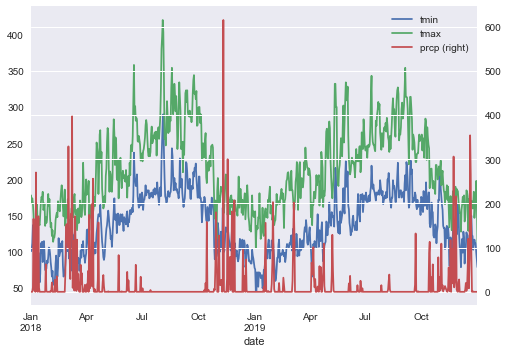

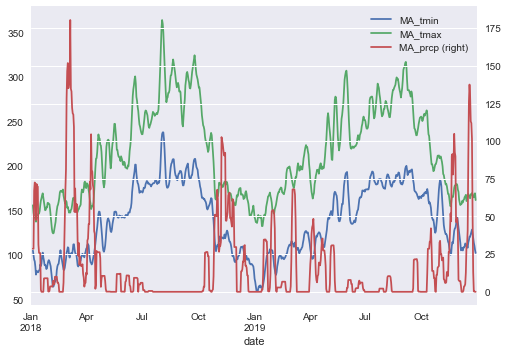

In [12]:
#Solve question here. Briefly justy you solution in the following markdown cell.

# creating new sub-dataset "Lisbon1819", only showing data from the Lisbon station for 2018 and 2019
Lisbon1819 = Lisbon[(Lisbon["date"].dt.year >= 2018) & (Lisbon["date"].dt.year <= 2019)]

# plotting the minimum and maximum temperatures, as well as the percipitation for every day in Lisbon 2018 and 2019
Lisbon1819.plot(x = "date", y = ["tmin", "tmax", "prcp"], secondary_y = ["prcp"])

# creating a copy of the "Lisbon1819"-dataframe to avoid the Pandas copy-error
Lisbon1819_smooth = Lisbon1819.copy()

# creating new columns, showing the moving averages of tmin and tmax of the last 7 days to smooth the curves
Lisbon1819_smooth["MA_tmin"] = Lisbon1819_smooth["tmin"].rolling(7, center = True).mean()
Lisbon1819_smooth["MA_tmax"] = Lisbon1819_smooth["tmax"].rolling(7, center = True).mean()
Lisbon1819_smooth["MA_prcp"] = Lisbon1819_smooth["prcp"].rolling(7, center = True).mean()

# plotting the smoothed minimum and maximum temperatures, as well as the raw percipitation data again
Lisbon1819_smooth.plot(x = "date", y = ["MA_tmin", "MA_tmax", "MA_prcp"], secondary_y = ["MA_prcp"])

**Rationale:** For smoothing the lines I used the centered moving average function because in my opinion it is most meaningful, if you take the surrounding values for each raw value into account, rather than only the previous ones like with the simple moving average. I decided, to compute the average for a time span of 7 days, creating an average of every value and it's previous and following 3 values. I plotted the smoothed lines into a seperate graph, so that it is not becoming too messy.

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

<AxesSubplot:xlabel='date'>

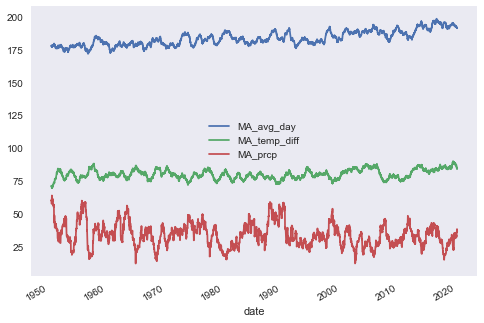

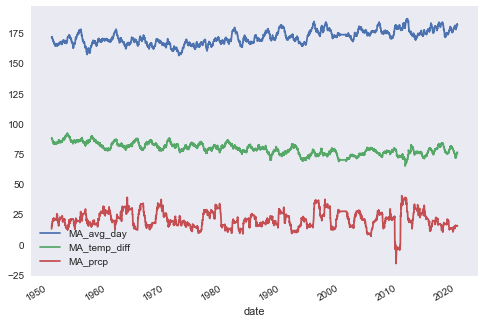

In [13]:
#Solve question here. Briefly justy you solution in the following markdown cell.

# creating subset of all_data, only showing data for the weather station in Sydney
Sydney = all_data[all_data["id"] == "ASN00066062"]

# creating a copy of the "Sydney"-dataframe to avoid the Pandas copy-error
Sydney_new = Sydney.copy()

# creating new column "avg_day", which shows the average between the maximum and minimum temperature of each day
Sydney_new["avg_day"] = (Sydney_new["temp_diff"] / 2) + Sydney_new["tmin"]

# creating and plotting new columns to show the 360-day centered moving averages of the average temperature, the temperature range and percipitation
Sydney_new["MA_avg_day"] = Sydney_new["avg_day"].rolling(360, center = True).mean()
Sydney_new["MA_temp_diff"] = Sydney_new["temp_diff"].rolling(360, center = True).mean()
Sydney_new["MA_prcp"] = Sydney_new["prcp"].rolling(360, center = True).mean()
Sydney_new.plot(x = "date", y = ["MA_avg_day", "MA_temp_diff", "MA_prcp"], secondary_y = ["prcp"])

# creating a copy of the "Lisbon"-dataframe to avoid the Pandas copy-error
Lisbon_new = Lisbon.copy()

# creating a new column "temp_diff" to show differences between tmax and tmin, because the "Lisbon" dataset hasn't had 
Lisbon_new["temp_diff"] = Lisbon_new["tmax"] - Lisbon_new["tmin"]

# creating new column "avg_day", which shows the average between the maximum and minimum teperature of each day
Lisbon_new["avg_day"] = (Lisbon_new["temp_diff"] / 2) + Lisbon_new["tmin"]

# creating and plotting new columns to show the 360-day centered moving averages of the average temperature, the temperature range and percipitation
Lisbon_new["MA_avg_day"] = Lisbon_new["avg_day"].rolling(360, center = True).mean()
Lisbon_new["MA_temp_diff"] = Lisbon_new["temp_diff"].rolling(360, center = True).mean()
Lisbon_new["MA_prcp"] = Lisbon_new["prcp"].rolling(360, center = True).mean()
Lisbon_new.plot(x = "date", y = ["MA_avg_day", "MA_temp_diff", "MA_prcp"], secondary_y = ["prcp"])

**Rationale:** To display a long-term trend regarding the average temperature, temperature range and precipiation, I used a 360-day centered moving average. I chose the number of 360, as we are observing a long time span of 70 years, so a high number of values taken into account is needed to smooth the lines. 

## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [14]:
#Solve question here. Briefly justy you solution in the following markdown cell.

# computing and printing the correlation coefficient between the minimum and maximum temperatures in Lisbon
tmax_tmin_corr = Lisbon_new[["tmin", "tmax"]].corr()
print(tmax_tmin_corr)

# computing and printing the correlation coefficient between the average temperature per day and the precipiation in Lisbon
avg_prcp_corr = Lisbon_new[["avg_day", "prcp"]].corr()
print(avg_prcp_corr)

         tmin     tmax
tmin  1.00000  0.80252
tmax  0.80252  1.00000
          avg_day      prcp
avg_day  1.000000 -0.165132
prcp    -0.165132  1.000000


**Present an interpretation of the results here:** With around 0.80 there is a strong positive correlation between the minimum and maximum temperature per day in Lisbon, which seems logical, as temperature differences within a day are usually relatively constant. Surprisingly, with a coefficient of around -0.16, in Lisbon there seems to be only a very weak correlation between average temperature and precipiation. However, what is not surprising is that the correlation is negative, which means that it tends to rain less when the temperatures are higher and vice versa.

### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [15]:
#Solve question here. Briefly justy you solution in the following markdown cell.

# renaming columns to clarify that the average temperature and precipitation refers to Lisbon
LIS = Lisbon_new[["date", "avg_day", "prcp"]]
LIS.columns = ["date", "avg_LIS", "prcp_LIS"]

# creating new subsets of "all_data", only containing data of Brisbane, Australia and Dublin, Ireland
BRIS = all_data[all_data["id"] == "ASN00040214"]
DUB = all_data[all_data["id"] == "EI000003969"]

# creating copies of "BRIS"- and "DUB"-dataframes to avoid the Pandas copy-error
BRIS = BRIS.copy()
DUB = DUB.copy()

# creating new columns, that show the average temperatures of each day in Brisbane and Dublin
BRIS["avg_BRIS"] = ((BRIS["tmax"] - BRIS["tmin"]) / 2) + BRIS["tmin"]
DUB["avg_DUB"] = ((DUB["tmax"] - DUB["tmin"]) / 2) + DUB["tmin"]

# reducing datasets to only the columns with the date, average temperature and precipitation
BRIS = BRIS[["date", "avg_BRIS", "prcp"]]
DUB = DUB[["date", "avg_DUB", "prcp"]]

# renaming columns to clarify which precipitation refers to which city
BRIS.columns = ["date", "avg_BRIS", "prcp_BRIS"]
DUB.columns = ["date", "avg_DUB", "prcp_DUB"]

# joining Lisbon and Brisbane data together in dataset "LIS_BRIS"
LIS_BRIS = LIS.join(BRIS.set_index("date"), on = "date")

# now also joining Dublin data to the "LIS_BRIS" dataset and remove NA-values
LIS_BRIS_DUB = LIS_BRIS.join(DUB.set_index("date"), on = "date").dropna()

# computing and printing the correlation coefficient for the average temperatures in the 3 cities
corr_avg_temp = LIS_BRIS_DUB[["avg_LIS", "avg_BRIS", "avg_DUB"]].corr()
print(corr_avg_temp)

# computing and printing the correlation coefficient for the precipitation values in the 3 cities
corr_prcp = LIS_BRIS_DUB[["prcp_LIS", "prcp_BRIS", "prcp_DUB"]].corr()
print(corr_prcp)

           avg_LIS  avg_BRIS   avg_DUB
avg_LIS   1.000000 -0.741887  0.791200
avg_BRIS -0.741887  1.000000 -0.732947
avg_DUB   0.791200 -0.732947  1.000000
           prcp_LIS  prcp_BRIS  prcp_DUB
prcp_LIS   1.000000   0.013656  0.065698
prcp_BRIS  0.013656   1.000000 -0.004184
prcp_DUB   0.065698  -0.004184  1.000000


**Rationale and comments:** I chose Brisbane and Lisbon as cities for which I expected similar weather conditions and Dublin as a city with different weather. However, the average temperature data shows that the strongest correlation is between Dublin and Lisbon (around 0.79), which is probably because of the geographical proximity. Even though Lisbon has a higher temperature level than Dublin, it changes quite similarly because both cities have the same seasons at the same time. Brisbane, on the other hand, is located in the southern hemisphere, which means that the seasons are the exact opposite there and they e.g. have summer, when it is winter in Lisbon or Dublin. As a logical consequence, Brisbane has a high negative correlation with the other 2 cities in terms of average temperature. Regarding the precipitation, there is almost no correlation between any of the 3 cities.

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [16]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

max_region = all_data[["region", "tmax"]].groupby("region").max()
print(max_region)

min_region = all_data[["region", "tmin"]].groupby("region").min()
print(min_region)

prcp_region = all_data[["region", "prcp"]].groupby("region").max()
print(prcp_region)

                                   tmax
region                                 
Africa                              498
Asia                                490
Australia/South Pacific             467
Europe                              442
Middle East                         513
North America                       433
South/Central America & Carribean   456
                                   tmin
region                                 
Africa                              -85
Asia                               -440
Australia/South Pacific             -67
Europe                             -381
Middle East                        -139
North America                      -512
South/Central America & Carribean   -85
                                   prcp
region                                 
Africa                             5001
Asia                               4549
Australia/South Pacific            3276
Europe                             2000
Middle East                        7780


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

<AxesSubplot:xlabel='year'>

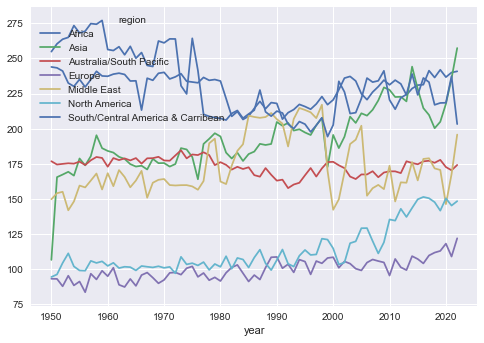

In [17]:
#Solve question here. Briefly justy you solution in the following markdown cell.

# adding a column to "all_data", showing the average temperatur of every day
all_data["avg_day"] = (all_data["temp_diff"] / 2) + all_data["tmin"]

# adding a column to "all_data", extracting only the year from the "date"-column
all_data["year"] = all_data["date"].dt.year

# computing the average temperature for every combination of year and region, unstacking the dataset and plotting it
all_data.groupby(["year", "region"])["avg_day"].mean().unstack().plot()

**Rationale:** In order to compare the evolution of the average temperature per region, I decided to compute an average for each region, on a yearly basis. Using the unstack() function I was able to pivot the dataset, so that it only consists of one row per year, transforming each region to a seperate column. Doing this, it was possible to get a single line per region in the plot.

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


<AxesSubplot:xlabel='year'>

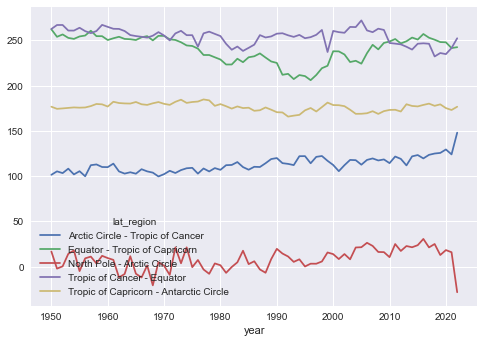

In [18]:
#Solve question here. Briefly justify you solution in the following markdown cell.

# import "where" function from numpy package to facilitate defining 4 latitude ranges in new column "lat_region"
from numpy import where
all_data["lat_region"] = where((all_data["lat"] <= 90) & (all_data["lat"] > 66.5), "North Pole - Arctic Circle", 
                                 where((all_data["lat"] <= 66.5) & (all_data["lat"] > 23.5), "Arctic Circle - Tropic of Cancer",
                                       where((all_data["lat"] <= 23.5) & (all_data["lat"] > 0), "Tropic of Cancer - Equator",
                                          where((all_data["lat"] <= 0) & (all_data["lat"] > -23.5), "Equator - Tropic of Capricorn",
                                               where((all_data["lat"] <= -23.5) & (all_data["lat"] > -66.5), "Tropic of Capricorn - Antarctic Circle", "Antarctic Circle - South Pole")))))

# computing the average temperature for every combination of year and latitude-range, unstacking the dataset and plotting it
all_data.groupby(["year", "lat_region"])["avg_day"].mean().unstack().plot()

**Rationale:** I defined six ranges, lying between the common latitude lines, to group the weather stations and its average temperatures throughout the years. However, there are only 5 lines displayed because there seems to be no data for stations in the southernmost latitude range (Antarctic Circle - South Pole). The coldest region displayed, by far is the northernmost region of the globe. It's followed by the latitude region directly below and it's complementary latitude range in the southern hemisphere. Interestingly, the difference between these two regions slowly decreased over the years. The warmest regions are the two, located around the equator, which is not a big surprise.